In [ ]:
# load libraries
import cv2 as cv
import numpy as np
from scipy.signal import convolve2d
from matplotlib import pyplot as plt

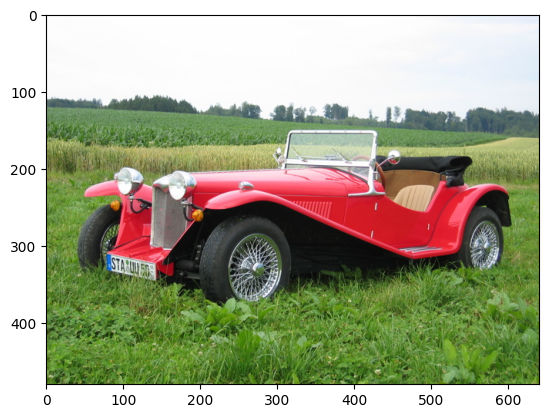

In [32]:
# load image, default flag 1
# 1: load color only bgr no alpha, shape [height, width, 3]
# 0: load grayscale no rgb no alpha, shape [height, width]
# -1: load alpha no rgb, shape [height, width, 4]
src = cv.imread("car.jpg")
plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))

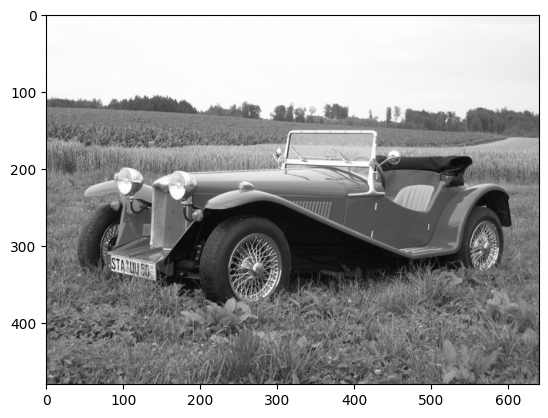

In [33]:
# convert to gray scale, src loaded as BGR not RGB
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
plt.imshow(src_gray, cmap="gray")

In [34]:
# sobel x and y kernels
x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

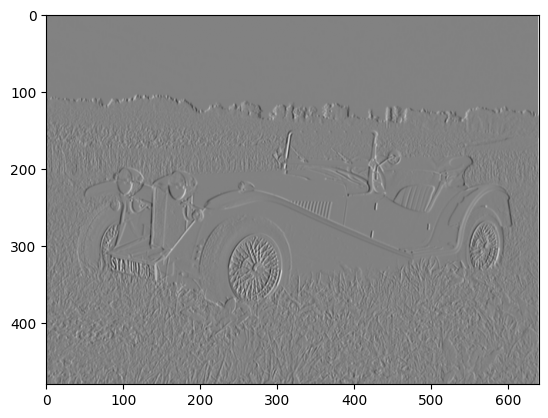

In [35]:
# perform 2d convolution
x_gradient = convolve2d(src_gray, x_kernel, mode = "same")
plt.imshow(x_gradient, cmap="gray")

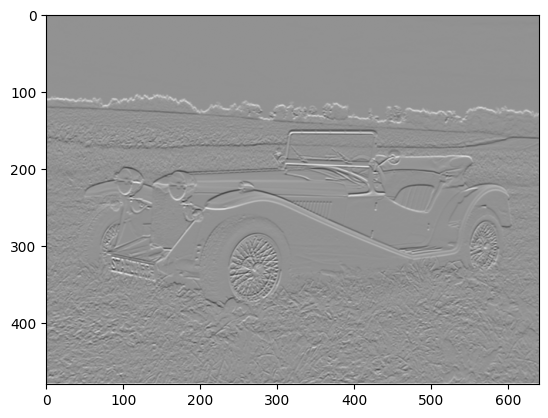

In [36]:
# perform 2d convolution
y_gradient = convolve2d(src_gray, y_kernel, mode = "same")
plt.imshow(y_gradient, cmap="gray")

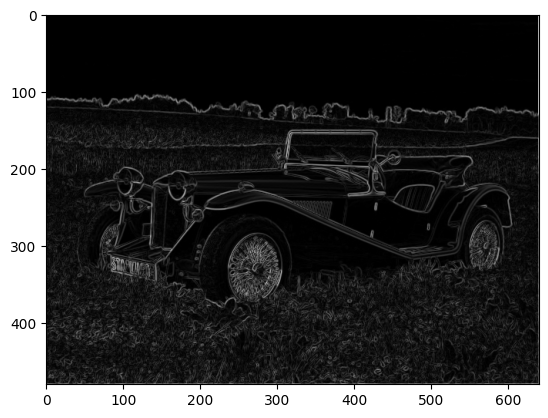

In [37]:
# take magnitude of gradients
mag = np.sqrt(np.square(x_gradient.astype(np.int32)) + np.square(y_gradient.astype(np.int32)))
plt.imshow(mag, cmap="gray")

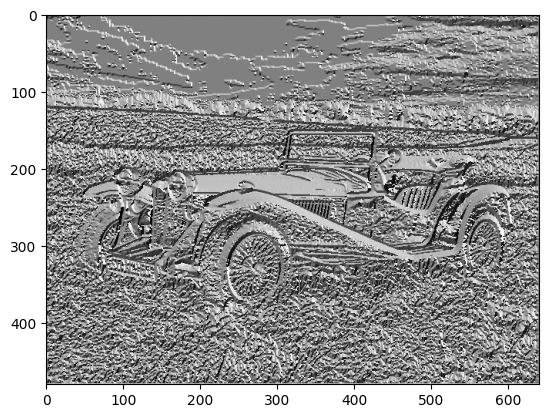

In [39]:
atan = np.arctan2(y_gradient, x_gradient) + np.pi
hue = np.rint(179 * (atan) / (2 * np.pi)).astype(np.uint8)
plt.imshow(hue, cmap="gray")